# Week 5 Quiz

## Zhuyan - zl2776

### Due Sunday Oct 18 7pm ET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Sklearn provides a set of commonly used example datasets. 
# They can be accessed through the datasets submodule.
from sklearn import datasets

# We're going to use the Linnerud dataset to practice Regression in sklearn.

# The Linnerud dataset is a tiny multi-output regression dataset. It consists of three
# excercise (data) and three physiological (target) variables collected from
# twenty middle-aged men in a fitness club.
linnerud = datasets.load_linnerud()

# The features of the dataset contain data on 3 exercises
# Chins - number of chinups
# Situps - number of situps
# Jumps - number of jumping jacks

# Note that the features and target come as numpy matrices.
# We'll first load the features into a pandas dataframe.
df = pd.DataFrame(linnerud.data,columns=linnerud.feature_names)

# We'll also add the target to our dataframe.
# Note also that this dataset contains multiple targets.
# We'll only consider one of them: Weight
df['Weight'] = linnerud.target[:,linnerud.target_names.index('Weight')]

# For more information on the dataset, uncomment the print command below
print(linnerud.DESCR)

# print the first 3 rows
df.head(3)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
excercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0


<AxesSubplot:xlabel='Situps', ylabel='Weight'>

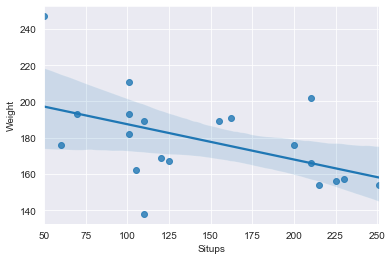

In [4]:
# What is the relationship between Situps and Weight?

# Plot a scatterplot and best-fit line for x=Situps vs y=Weight using seaborn sns.regplot()
sns.regplot(x='Situps', y='Weight', data=df)

In [13]:
# The above plot should indicate a negative relationship between Situps and Weight
# How much does Weight go down if Situps goes up?
# To answer this we'll train a simple linear model.

# First import LinearRegression from sklearn.inear_model
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object with default parameter settings
#   and store as lr
lr = LinearRegression()

# Fit lf using X = df.Situps.values.reshape(-1,1) and y = df.Weight
# Recall that we need to use reshape because sklearn expects X to be two dimensional
lr.fit(df.Situps.values.reshape(-1,1), df.Weight)

# Using the learned parameters in coef_ and intercept_, 
#   by how much do we expect Weight to go down when Situps goes up by 1?
# Print with a precision of 2

print(f'{-lr.coef_[0]:.2f}')

# Using the learned parameters in coef_ and intercept_, 
#   what should we expect weight to be when when Situps is 0?

print(lr.intercept_)

0.19
206.92177079054733


In [18]:
# How is Weight related to all 3 features?

# Instantiate a second LinearRegression model with default parameters and store as mlr
# Fit this model using all of the features: Chins, Situps, Jumps
# Careful not to include Weight in X!
# Note that here we can pass the dataframe columns directly without using .values.reshape()
mlr = LinearRegression().fit(df[['Chins', 'Situps', 'Jumps']], df.Weight)

# Print out the name and learned coefficient for each feature in the model
# It looks like one of the features actually has a positive relationship.
for name,coef in zip(('Chins', 'Situps', 'Jumps'), mlr.coef_):
    print(f'{name:6s}: {coef}')

Chins : -0.47502635866380055
Situps: -0.21771646975131506
Jumps : 0.09308837062185486


In [19]:
# NOT REQUIRED

# For those that are interested in the extra practice, and to explore how statsmodels works

# Import the statsmodels api
import statsmodels.api as sm

# Store the 3 features from df as X
X = df[['Chins', 'Situps', 'Jumps']]

# Add a constant to X (in order to learn the bias term) using sm.add_constant()
X = sm.add_constant(X)

# Instantiate and fit an OLS model using X and df.Weight and store as model
# Note that in OLS, the target y is the first parameter!
sm_mlr = sm.OLS(df.Weight,X).fit()

# Display the model summary
sm_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.952
Date:                Fri, 16 Oct 2020   Prob (F-statistic):              0.162
Time:                        15:59:08   Log-Likelihood:                -88.876
No. Observations:                  20   AIC:                             185.8
Df Residuals:                      16   BIC:                             189.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.2335     13.451     15.481      0.000     179.718     236.749
Chins         -0.4750      1.393     -0.341      0.738      -3.428       2.478
Situps        -0.2177      0.138     -1.583      0.133      -0.509       0.074
Jumps          0.0931      0.139      0.671      0.512      -0.201       0.387
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.219
Skew:                           0.077   Prob(JB):                        0.896
Kurtosis:                       3.489   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""